![Bellabeat](http://play-lh.googleusercontent.com/1DEgw7f-f8Dtp7r0lZ3qn7FfsNb_zYGWVkrAdf5ht8eDFEnRi1HX5Qk-NRTJ9cwbzUg)

# Introduction - Bellabeat

**How Can a Wellness Technology Company Play it Smart?**

Bellabeat empowers women worldwide by leveraging innovative technology to track and enhance overall health, facilitating a strong mind-body connection throughout various life stages. As a tech-driven company specializing in health-focused smart products, Bellabeat offers a variety of devices that monitor activity, sleep, stress, and reproductive health, providing women with valuable insights into their well-being.
The primary goal of this case study is to analyze fitness data from smart devices to identify potential growth opportunities for Bellabeat, with a particular focus on one of their key products: the Bellabeat app.

Key Stakeholders:

•	Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer

•	Sando Mur: Bellabeat cofounder; key member of Bellabeat executive team

•	Bellabeat Marketing Analytics team


# Step 1: Ask

1. What are some trends in smart device usage? 
2. How could these trends apply to Bellabeat customers? 
3. How could these trends help influence Bellabeat marketing strategy?





# Step 2: Prepare 

The data source for this case study is the FitBit Fitness Tracker Data, a comprehensive dataset that provides valuable insights into various fitness and activity metrics. This dataset is hosted on Kaggle and made available under the CC0 Public Domain license by [Mobius](http://https://www.kaggle.com/arashnic). It consists of 18 .csv files, containing detailed information on activity metrics, calories burned, sleep records, metabolic equivalent of tasks (METs), heart rate, and steps. These metrics are recorded across different timeframes, including seconds, minutes, hours, and days, allowing for a granular analysis of fitness behaviors.

By leveraging this dataset, the case study aims to explore patterns and trends in fitness activities, offering a deeper understanding of how individuals engage with their routines and the impact on their overall health.
However, it is important to note some limitations that could affect the results of the analysis:

-Missing Demographics: The dataset lacks demographic information, which may limit the ability to analyze trends based on age, gender, or other factors.

Small Sample Size: The limited number of participants in the dataset may not fully represent the broader population, potentially impacting the generalizability of the findings.

-Short Data Collection Period: The data was collected over a relatively short period, which may not capture long-term trends or seasonal variations.

*These limitations should be taken into account when interpreting the results of the analysis.*


# Step 3: Process


**Loading Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

from pandas.api.types import CategoricalDtype


***Importing Datasets***

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

***Importing the dataset "daily_activity_merged.csv" using the pandas pd.read.csv() function***

In [3]:
df = pd.read_csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

***Data Exploration***

In [4]:
df.shape

(940, 15)

We have 940 rows and 15 columns in the dataset. Let's examine the column names using the `.columns` function from pandas. 

In [5]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

With the column names in hand, let's take a quick look at the rows and data using the `.head()` function from pandas.

In [6]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


The dataset tracks daily data collected by FitBit fitness tracking devices, such as smartwatches and fitness apps. Here is a summary of the columns:

- **Id**: A unique identifier for each user in the survey.
- **ActivityDate**: The specific date of the entry.
- **TotalSteps**: The total number of steps taken by each user each day.
- **TotalDistance**: The total distance traveled by each user each day.
- **TrackerDistance**: The distance recorded by the device each day.
- **LoggedActivitiesDistance**: The distance tracked by the device for specific activities.
- **VeryActiveDistance**: The distance traveled during periods of intense physical activity.
- **ModeratelyActiveDistance**: The distance traveled during periods of moderate physical activity.
- **LightActiveDistance**: The distance traveled during periods of light physical activity.
- **SedentaryActiveDistance**: The distance traveled while in a sedentary state.
- **VeryActiveMinutes**: The minutes spent in intense physical activity.
- **FairlyActiveMinutes**: The minutes spent in moderate physical activity.
- **LightlyActiveMinutes**: The minutes spent in light physical activity.
- **SedentaryMinutes**: The minutes spent in a sedentary state.
- **Calories**: The number of calories burned on that specific day.

After reviewing the columns and data, we can begin the data cleaning process.

***Clean the data**

First, we should verify that the data types match the content and purpose of each column. We can use the `.dtypes` function to check this.

In [7]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

We observe that the **Id** column is currently an integer, but it should be a string or object because it serves only as an identifier and is not intended for mathematical operations such as sums or multiplications.

Additionally, the **ActivityDate** column is currently an object but should be formatted as a Date.

Apart from these two columns, the data types of the remaining columns appear to be correct.

In [8]:
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y')
df.dtypes # a recheck will be done after reorganization.

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

We will now address the formatting issues by converting the **Id** column from an integer to a string using the `.astype(str)` function, and changing the **ActivityDate** column from an object (or string) to a datetime format.

***Checking Column Values***

Next, we will examine the relevance of each column for our analysis. Initially, we note that the **TotalDistance** column and other distance-related columns may be redundant. At first glance, **TotalDistance** and **TrackerDistance** appear to have similar values, but we need to confirm this. Additionally, we will investigate whether **TrackerDistance** or **TotalDistance** is the sum of the various "*ActiveDistance" columns, as this assumption may need verification.

In [9]:
# We will create a new column by summing the "ActiveDistance" columns to verify if it matches the **TotalDistance** or **TrackerDistance** columns.

df['sum_distance'] = df['VeryActiveDistance'] + df['ModeratelyActiveDistance'] + df['LightActiveDistance'] + df['SedentaryActiveDistance']

# We also observe that **LoggedActivitiesDistance** predominantly contains values of 0.0. We will filter the data to identify the entries where the value is greater than 0.

df.loc[(df['LoggedActivitiesDistance'] > 0),['TotalDistance','TrackerDistance','LoggedActivitiesDistance','sum_distance']]

,TotalDistance,TrackerDistance,LoggedActivitiesDistance,sum_distance
668,5.27,5.27,1.959596,5.08
689,9.71,7.88,4.081692,9.71
693,9.27,9.08,2.785175,9.26
707,8.72,8.68,3.167822,8.73
711,10.29,9.48,4.869783,10.29
712,9.65,8.60,4.851307,9.65
713,8.24,7.48,3.285415,8.25
717,10.98,9.91,4.930550,10.98
718,10.48,9.50,4.942142,10.48
719,11.31,10.41,4.924841,11.32


The previous analysis indicates that while **TotalDistance** and **TrackerDistance** are not always identical, they are very similar in most cases. We also observed that **LoggedActivitiesDistance** has some non-zero entries, though these are infrequent. Additionally, the sum of the **ActiveDistance** columns closely matches the **TotalDistance**, with only minor differences due to rounding.

Given this, we need to decide whether to keep or remove some columns. Since **TotalDistance** and **TrackerDistance** are almost always similar, with **TotalDistance** generally having higher values, we will retain the **TotalDistance** column.

Regarding the **ActiveDistance** columns, the exact criteria for categorization (e.g., the difference between 'Moderately Active' and 'Very Active') are unclear without further information, such as heart rate or steps per minute. Despite this uncertainty, we will keep these columns.

Similarly, the **ActiveMinutes** columns will be retained and combined into a new column for analysis.

In [10]:
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']

Next, we'll rename the columns using the `rename` function and convert all column names to lowercase using the `str.lower()` function.

In [11]:
df.columns = df.columns.str.lower()
df.rename(columns = {'trackerdistance':'tracker_distance','activitydate':'activity_date','totalsteps':'total_steps','totaldistance':'total_distance',
       'loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance':'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes',
       'fairlyactiveminutes':'fairly_active_minutes','lightlyactiveminutes':'lightly_active_minutes',
       'sedentaryminutes':'sedentary_minutes'}
         ,inplace=True) 
print('check the name of the columns:')
df.columns

check the name of the columns:


Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'sum_distance', 'totalminutes'],
      dtype='object')

***Creating Columns***

Let's add a column to indicate the day of the week using the `day_name()` function, and another column to show the day number of the week using the `weekday()` function.

In [12]:
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] = day_of_week

df['n_day_of_week'] = df['activity_date'].dt.weekday # 0 monday 6 sunday

***Check for empty cell and null values***

Check for empty cells and null values using the `isna()` function in combination with `sum()`.

In [13]:
print('Total number of null values are: ')
print(df.isna().sum())

Total number of null values are: 
id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
sum_distance                  0
totalminutes                  0
day_of_week                   0
n_day_of_week                 0
dtype: int64


***Checking for duplicate entries using the `duplicated().sum()` function.*****

In [14]:
print('Total number of duplicated values are: ',df.duplicated().sum())

Total number of duplicated values are:  0


As noted above, there are no duplicated or null values.

***Subset the data***

Now, we can select only the columns that will be used for our analysis. 

In [15]:
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       #'tracker_distance', 'logged_activities_distance',
       #'very_active_distance', 'moderately_active_distance',
       #'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       #'sum_distance','totalminutes', 
       'day_of_week', 'n_day_of_week'
        ]].copy()

**Category Creation**

Next, I will create my own user categorization based on physical activity levels and device usage:

**Physical Activity Levels:**
- **Sedentary:** Fewer than 5,000 daily steps on average
- **Active:** Between 5,000 and 10,000 daily steps on average
- **Very Active:** More than 10,000 daily steps on average

**Device Usage:**
- **Low Use:** Less than 8 hours of use per day
- **Normal Use:** Between 8 and 16 hours of use per day
- **High Use:** More than 16 hours of use per day

For this dataset, I will initially create the **activity_level** category. I will address device usage categorization when analyzing a dataset with hourly data.

In [16]:
# Group the data by id:
id_grp = df.groupby(['id'])

# Search for average amount of steps and sort the results in descending order:
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending=False)

# Afterward, I will convert the results into a DataFrame:
id_avg_step = id_avg_step.to_frame()


#I want to create a new column that categorizes each user based on their average of daily steps. The conditions for categorization are:
conditions = [
    (id_avg_step <=5000),
    (id_avg_step > 5000) & (id_avg_step < 10000),
    (id_avg_step >= 10000)
] # These are the conditions

values = ['sedentary','active','very_active'] # name of the values:

#I create a column using the `np.select` function from NumPy to assign each ID to a category:
id_avg_step['activity_level'] = np.select(conditions,values)

#I store the results in a variable for use in the next step:
id_activity_level = id_avg_step['activity_level']

#I use a list comprehension to create the **activity_level** column in the original dataset.This list comprehension retrieves the categories where the index matches the **id** column:
df['activity_level'] = [id_activity_level[c] for c in df['id']]

# Step 4: Analyze


Let's determine the number of unique IDs using the `nunique()` function, and identify the unique IDs using the `unique()` function.

In [17]:
print('Number of unique values in id column:',df['id'].nunique())
print()
print('List of id values:',df['id'].unique())

Number of unique values in id column: 33

List of id values: ['1503960366' '1624580081' '1644430081' '1844505072' '1927972279'
 '2022484408' '2026352035' '2320127002' '2347167796' '2873212765'
 '3372868164' '3977333714' '4020332650' '4057192912' '4319703577'
 '4388161847' '4445114986' '4558609924' '4702921684' '5553957443'
 '5577150313' '6117666160' '6290855005' '6775888955' '6962181067'
 '7007744171' '7086361926' '8053475328' '8253242879' '8378563200'
 '8583815059' '8792009665' '8877689391']


Let's check how many times each ID appears in the dataset using the `value_counts()` function.

In [18]:
print('How many times each id appears in the dataset?')
print(df['id'].value_counts())

How many times each id appears in the dataset?
id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64


As observed, there are 33 unique IDs (or users), with most appearing 31 times throughout the dataset, and some appearing fewer times.

Next, let's examine the date column to determine the minimum and maximum dates, the number of days between them, and the number of unique dates.

In [19]:
print('The min date is:',min(df['activity_date']))
print('The max date is:',max(df['activity_date']))
print('The number of unique dates are:',df['activity_date'].nunique())

The min date is: 2016-04-12 00:00:00
The max date is: 2016-05-12 00:00:00
The number of unique dates are: 31


We can see that the dataset covers exactly 31 days, ranging from '2016-04-12' to '2016-05-12'.

Now we can begin the exploratory data analysis.

In [20]:
#First, we'll use the `describe()` function to view some summary statistics:

df.describe()

,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,n_day_of_week
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379


Here, we can observe the mean (average), minimum and maximum values, the 50th percentile (median), and other statistics.

Notably, the maximum values indicate that someone walked 28 miles and burned 4,900 calories. These figures could be outliers, so we may need to investigate them further later on.

# Step 5: Share 


***What is the correlation between the number of steps taken and the number of calories burned?*****

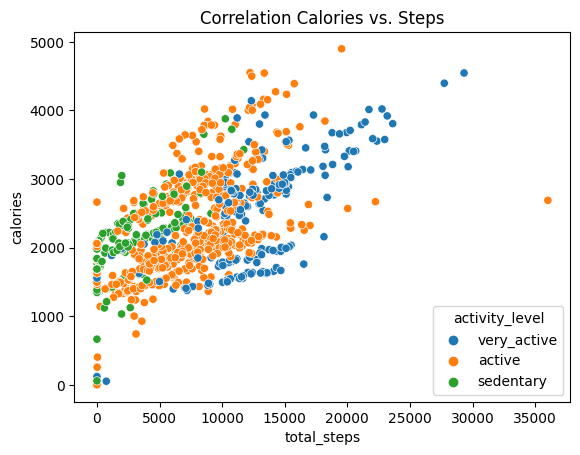

In [21]:
ax =sns.scatterplot(x='total_steps', y='calories', data=df,hue='activity_level')

#handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles, day_of_week, fontsize=7)
plt.title('Correlation Calories vs. Steps')

plt.show()

The scatterplot reveals a positive correlation: as the number of steps increases, the number of calories burned also tends to increase. We have differentiated the data points by color according to the **activity_level** category, allowing us to see the representation of each activity level group.

**Average number steps per day**

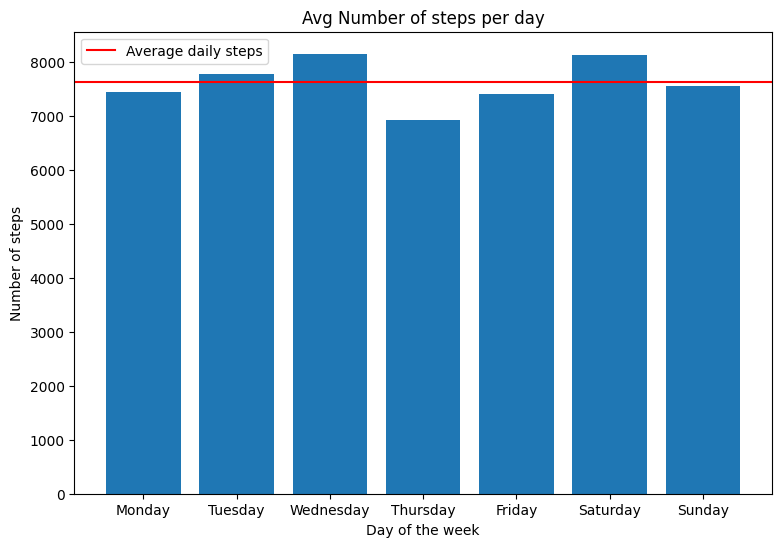

In [22]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday']
fig, ax =plt.subplots(1,1,figsize=(9,6))

day_grp = df.groupby(['day_of_week'])
avg_daily_steps= day_grp['total_steps'].mean()
avg_steps = df['total_steps'].mean()

plt.bar(avg_daily_steps.index,avg_daily_steps)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(y=avg_daily_steps.mean(),color='red', label='Average daily steps')
ax.set_ylabel('Number of steps')
ax.set_xlabel('Day of the week')
ax.set_title('Avg Number of steps per day')

plt.legend()
plt.show()

The results indicate that users were most physically active on Monday, Tuesday, and Saturday, with these days showing an above-average number of steps overall. Conversely, Wednesday, Thursday, and Friday had below-average activity levels, although they were relatively similar to each other. Sunday was the least active day of the week.

From this information, we can infer that users tend to be more physically active at the beginning of the week and on Saturdays, which may suggest specific activities or routines on these days.

**Percentage in activity in minutes**

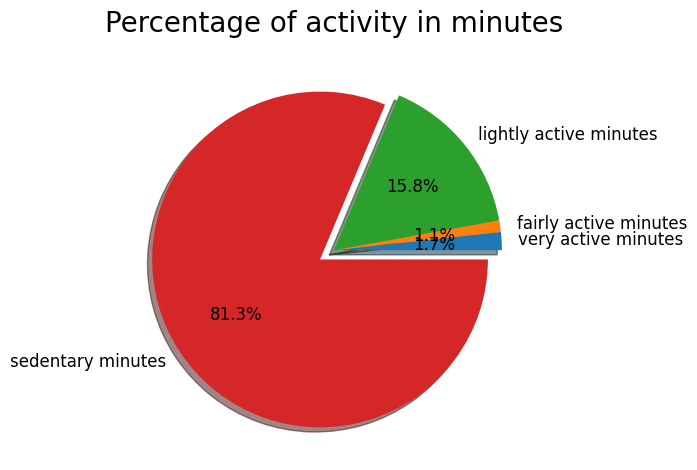

In [23]:
very_active_mins = df['very_active_minutes'].sum() 
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary_minutes'].sum()

slices = [very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]
labels = ['very active minutes','fairly active minutes','lightly active minutes','sedentary minutes']
explode = [0,0,0,0.1]
plt.pie(slices, labels = labels, explode = explode, autopct='%1.1f%%',textprops=dict(size=12), shadow=True)

plt.title('Percentage of activity in minutes',fontsize=20)
plt.tight_layout()

plt.show()

This pie chart illustrates that users are mostly in a sedentary state, with a small fraction of time spent in light activity and only 2% of the time engaged in vigorous exercise.

**Correlation between activity level minutes and calories**

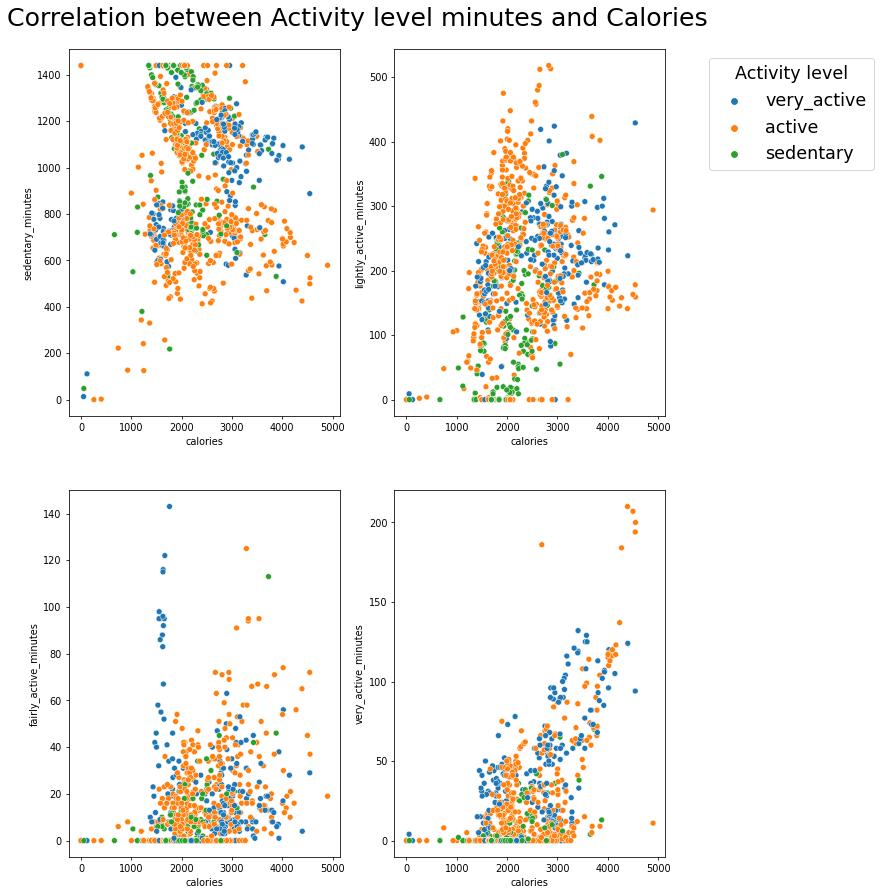

In [24]:
n_day_of_week = [0,1,2,3,4,5,6]

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(11,15),dpi=70)

sns.scatterplot(data=df,x='calories',y='sedentary_minutes',hue='activity_level',ax=axes[0,0],legend=False)

sns.scatterplot(data=df,x='calories',y='lightly_active_minutes',hue='activity_level',ax=axes[0,1],legend=False)

sns.scatterplot(data=df,x='calories',y='fairly_active_minutes',hue='activity_level',ax=axes[1,0],legend=False)

sns.scatterplot(data=df,x='calories',y='very_active_minutes',hue='activity_level',ax=axes[1,1])


plt.legend(title='Activity level',title_fontsize=18,bbox_to_anchor=(1.8,2.2),fontsize=18,frameon=True,scatterpoints=1)
fig.suptitle('Correlation between Activity level minutes and Calories',x=0.5,y=0.92,fontsize=26)
plt.show()

# Step 6:Act

After analyzing the FitBit Fitness Tracker Data, we have uncovered insights that could inform and enhance Bellabeat's marketing strategy.

**Target Audience**

Our target audience consists of women who work full-time jobs and spend significant time at the computer, in meetings, or focused on their work, as indicated by the sedentary time data. 

These women engage in some light activity to maintain their health, based on the activity type analysis. However, they need to increase their daily activity levels to gain greater health benefits. They may benefit from guidance on developing healthy habits or motivation to stay active.

Since the dataset lacks gender information, it is assumed that all genders are represented and balanced.

**Key Message for the Bellabeat Online Campaign**

The Bellabeat app is more than just a fitness tracker—it's a supportive guide that helps women balance their personal and professional lives with healthy habits. By providing daily recommendations and motivation, the app empowers users to integrate wellness into their routines effectively.

**Ideas for the Bellabeat App**

1. **Step Goals and Health Benefits:** The marketing team should emphasize the importance of regular exercise for maintaining overall health and well-being. The average daily step count is 7,638, slightly below the CDC’s recommended 10,000 steps for optimal health benefits.Bellabeat could encourage users to reach at least 10,000 steps per day by highlighting the associated health benefits, such as a 53% lower risk of all-cause mortality. [Preventing Chronic Disease, Volume 14, E83 issue](http://www.cdc.gov/pcd/issues/2016/pdf/16_0111.pdf)

2. **Calorie Management for Weight Loss:** For users looking to lose weight, Bellabeat could offer personalized suggestions for healthy, low-calorie meals for lunch and dinner, aiding in effective daily calorie management.

3. **Sleep Improvement Notifications:** To help users improve their sleep, Bellabeat could utilize app notifications to remind users when it's time to go to bed, promoting better sleep habits.

4. **Activity Reminders:** Given that most user activity occurs between 5 PM and 7 PM, possibly due to gym sessions or walks after work, Bellabeat could send reminders and motivational prompts during this time to encourage users to go for a run or walk.

5. **Reducing Sedentary Time:** As a sleep improvement strategy, Bellabeat could recommend reducing sedentary time, helping users stay active throughout the day to enhance overall sleep quality.